In [1]:
import aocd
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = aocd.get_data(day=13)
points, folds = data.split('\n\n')

points = (line.split(',') for line in points.splitlines())
points = [(int(x), int(y)) for x, y in points]

r = re.compile(r'.*(.)=(.+)')
folds = (r.match(line) for line in folds.splitlines())
folds = [(m.group(1), int(m.group(2))) for m in folds]

In [3]:
xmax, ymax = max(x for x, _ in points), max(y for _, y in points)
grid = np.zeros((ymax+1, xmax+1), dtype=bool)
for x, y in points:
    grid[y, x] = True

Task 1: 737


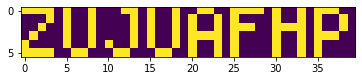

In [4]:
folded = grid.copy()
for n, (dir, pos) in enumerate(folds):
    if dir == 'y':
        top = folded[:pos, :]
        bottom = folded[pos+1:, :]
        if top.size > bottom.size:
            bottom = np.pad(bottom, ((0,1), (0,0)))
        folded = top | np.flipud(bottom)
    else:
        left = folded[:, :pos]
        right = folded[:, pos+1:]
        if left.size > right.size:
            right = np.pad(right, ((0,0), (0,1)))
        folded = left | np.fliplr(right)

    if n == 0:
        print("Task 1:", np.count_nonzero(folded))

plt.imshow(folded)